#### Price 예측 - 다항회귀
- 데이터셋 : auto_mpg.csv
- 학습종류 : 지도학습 / 회귀Regression - 값을 예측
- 알고리즘 : 선형회귀, 다항회귀, knn
- 피쳐 : weight
- 타겟:  mpg



In [2]:
## 1-1
import pandas as pd
# 데이터 분석 및 전처리
import numpy as np
# 숫자처리
import matplotlib.pyplot as plt
# 데이터 시각화
from sklearn.neighbors import KNeighborsRegressor
                                #knn
from sklearn.linear_model import LinearRegression
                            ## ML 알고리즘
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
                            ## 성능평가 모듈
from sklearn.model_selection import train_test_split
                            ## 데이터셋 분리 관련 모듈
                            ## 학습/검증/테스트 
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
                            ## 정규화, 컬럼추가

In [3]:
mpgDF = pd.DataFrame(pd.read_csv('../data/auto_mpg.csv',usecols=[0,2,3,4],engine='python'))
mpgDF.shape

(404, 4)

In [4]:
mpgDF.head()

,mpg,displacement,horsepower,weight
0,18.0,307.0,130,3504.0
1,15.0,350.0,165,3693.0
2,18.0,318.0,150,3436.0
3,16.0,304.0,150,3433.0
4,17.0,302.0,140,3449.0


In [5]:
mpgDF.isna().sum()
mpgDF['weight']=mpgDF['weight'].ffill()

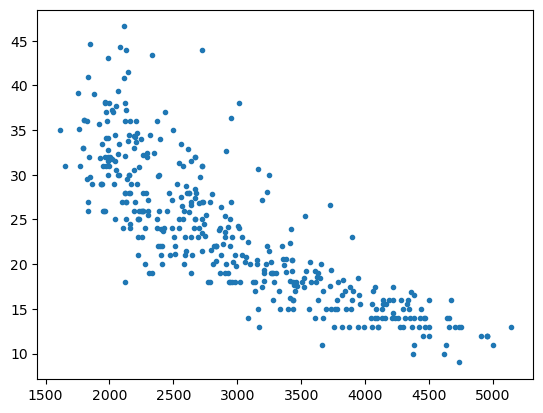

In [6]:
plt.plot(mpgDF['weight'],mpgDF['mpg'], '.')

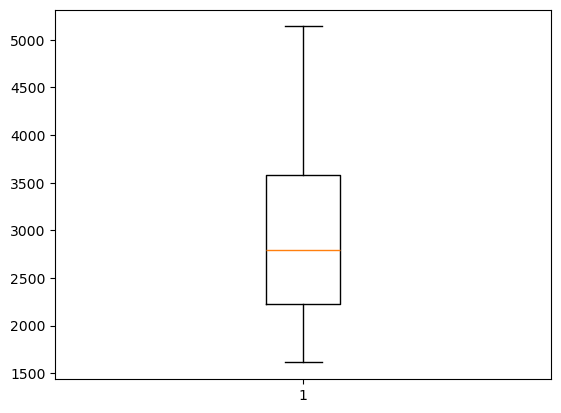

In [43]:
# basic plot
plt.boxplot(mpgDF['weight'])
plt.show()

mpg와 연관성 있는 데이터.
- cylinder, displacement, horsepower, weight
- weight만.

In [44]:
feature = mpgDF[['weight']]
target = mpgDF['mpg']

[3] 데이터셋 준비
- 피처와 타겟 분리
- 학습용/검증용/테스트용 데이터셋 분리 => 학습용과 테스트용으로만 분리

In [45]:
## 3-1 피처와 타겟 분리
featureDF = feature
targetSR = target
print(f"featureDF => {featureDF.ndim}D, targetSr => {targetSR.ndim}D")

featureDF => 2D, targetSr => 1D


In [46]:
## 3-2 데이터셋 분리 => 학습용 : 테스트용 75:25 (default ratio)
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size =0.25,
                                                    random_state=5)
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape} / y_test => {X_test.ndim}D, {y_test.shape}")

X_train => 2D (303, 1) / X_test => 2D, (101, 1)
y_train => 1D (303,) / y_test => 2D, (101,)


[4] 학습 진행

In [47]:
kn =  KNeighborsRegressor()
lr = LinearRegression()
pl = PolynomialFeatures() 

kn.fit(X_train,y_train)
lr.fit(X_train,y_train)
pl.fit(X_train,y_train)

PolynomialFeatures()

knn부터

In [48]:
print(kn.n_features_in_)
print(kn.n_samples_fit_)
# print(kn.feature_names_in_)
print(kn.effective_metric_)
#거리 재는 방법

1
303
euclidean


In [49]:
featureDF.mean()

weight    2966.618812
dtype: float64

In [50]:
y_train.index

Index([ 89, 191, 222,  18,  24,  33, 123, 376, 250, 249,
       ...
       158, 112, 231, 228,   8,  73, 118, 189, 206, 355],
      dtype='int64', length=303)

In [51]:
distance, indices = kn.kneighbors([[2966]])
indices = indices.reshape(-1)
y_train.iloc[indices]
# idx = y_train[indices].index.tolist()
# idx

c:\Users\kdt\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


254    20.2
45     18.0
178    23.0
78     21.0
392    27.0
Name: mpg, dtype: float64

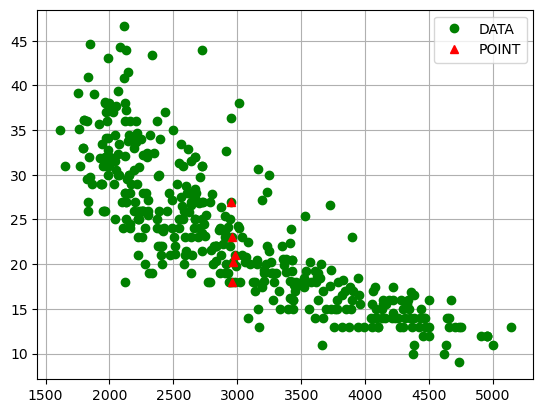

In [52]:
## 무게와 길이의 분포
plt.plot(featureDF, targetSR,'og', label = 'DATA')
# plt.plot(X_train.iloc[0], y_train[0], '^b', label = 'POINT')
plt.plot(X_train.iloc[indices], y_train.iloc[indices], '^r', label = 'POINT')

plt.legend()
plt.grid()
plt.show()

In [53]:
# 데이터 개수
train_data = X_train
train_label = y_train
DATANUMS = train_data.shape[0]

#k 갯수에 따른 모델 성능과 비용함수값 저장
HISTORY = [[],[]] # [score_list, rmse_list]
HISTORY = {'score':[], 'rmse':[]}

# k 갯수에 따른 모델 성능 및 비용 계산
for k in range(1, DATANUMS+1):
    #KNR 인스턴스 생성
    model = KNeighborsRegressor(n_neighbors=k)
    
    #KNR 학습 및 예측
    model.fit(train_data, train_label)
    pre_ = model.predict(train_data)
    
    #KNR 성능평가 및 비용계산
    score = model.score(train_data, train_label)
    rmse = root_mean_squared_error(train_label, pre_)
    #저장
    HISTORY['score'].append(score)
    HISTORY['rmse'].append(rmse)
    
    
print(HISTORY)

{'score': [0.8895049261004822, 0.8228907235597742, 0.7945778429769519, 0.7764142319112346, 0.7637625872704601, 0.7571971832713232, 0.7497360884477055, 0.7409239590457102, 0.732668416308665, 0.7238033643529123, 0.7212889872670281, 0.722205640585255, 0.7184508150809106, 0.7181301778081501, 0.718206171293321, 0.7213459199743841, 0.7194974163942186, 0.7195911449526196, 0.7224141333967917, 0.7206060883676921, 0.7195899577500724, 0.7205985434138142, 0.7204065196390947, 0.7203345676502655, 0.7206098075792782, 0.7198224759470983, 0.7186117380071676, 0.7193843754864786, 0.7193136335772361, 0.7203215879836381, 0.719090575169414, 0.717422697715735, 0.7175324026474568, 0.7167902283096124, 0.717060246306005, 0.715333847011498, 0.7142813779277428, 0.7134587090986095, 0.7116041128782984, 0.7118485781307791, 0.7118627101236122, 0.7105452902, 0.711097038498332, 0.7112516196761838, 0.7103235314342516, 0.7110962297049801, 0.7109658447117211, 0.7115532250276608, 0.7103016942949243, 0.7091077561215204, 0.7

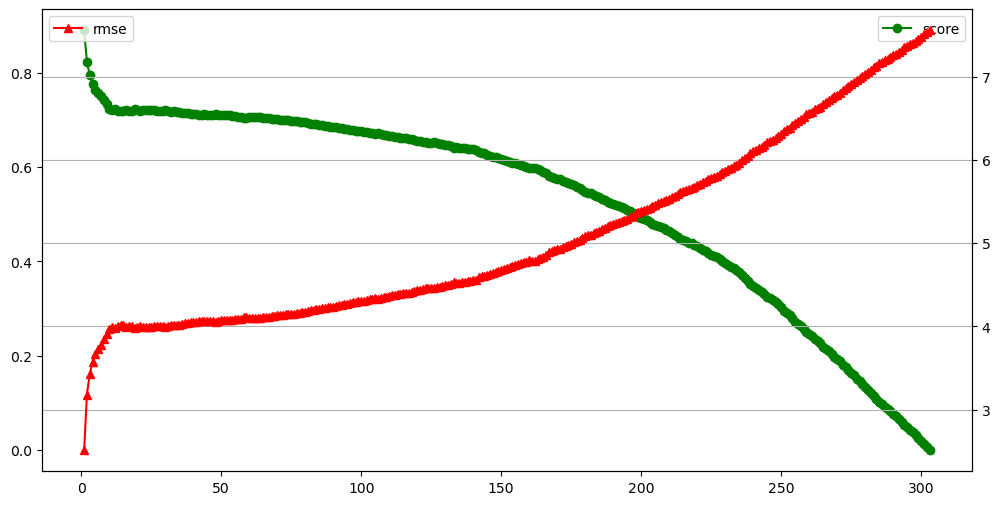

In [54]:
## 무게와 길이의 분포
fig, ax = plt.subplots(figsize= (12,6))
ax.plot(range(1, DATANUMS+1), HISTORY['score'],'og-', label = 'score')
# for i in range(1, DATANUMS+1):
#     ax.text(i, HISTORY['score'][i-1], str(i))
# score 0~1 1이 이상적
ax2 = plt.twinx(ax)
ax2.plot(range(1, DATANUMS+1), HISTORY['rmse'],'^r-', label = 'rmse')
# for i in range(1, DATANUMS+1):
#     ax2.text(i, HISTORY['rmse'][i-1], str(i))
    

# rmse 0~1 0이 이상적
# plt.xlabel('k')
# plt.ylabel('rmse')
ax.legend()
ax2.legend()
plt.grid()
plt.show()

In [55]:
print('SCORE', min(HISTORY['score']), max(HISTORY['score']))
print('RMSE', min(HISTORY['rmse']), max(HISTORY['rmse']))

SCORE 0.0 0.8895049261004822
RMSE 2.511997614091486 7.5569711498399785


In [56]:
test_data =  X_test
test_label = y_test
    #KNR 인스턴스 생성
model = KNeighborsRegressor()

#KNR 학습 및 예측
model.fit(test_data, test_label)
pre_ = model.predict(test_data)

#KNR 성능평가 및 비용계산
score = model.score(test_data, test_label)
rmse = root_mean_squared_error(test_label, pre_)

print(score, rmse)

0.7448669775043715 4.224226216564741


In [57]:
## 모듈화
knn_dict = {x:[] for x in ['score', 'r2score','rmse', 'mse', 'mae']}
for x, y in [[X_train,  y_train], [X_test, y_test]]:
    score = kn.score(x, y)
    pre_y = kn.predict(x)
    r2score = r2_score(y, pre_y)
    rmse = root_mean_squared_error(y, pre_y)
    mse = mean_squared_error(y, pre_y)
    mae = mean_absolute_error(y,pre_y)
    knn_dict['score'].append(score)
    knn_dict['r2score'].append(r2score)
    knn_dict['rmse'].append(rmse)
    knn_dict['mse'].append(mse)
    knn_dict['mae'].append(mae)

knn_dict    
    

{'score': [0.7637625872704601, 0.6325936729180314],
 'r2score': [0.7637625872704601, 0.6325936729180314],
 'rmse': [3.673009934671838, 5.069173385462485],
 'mse': [13.49100198019802, 25.69651881188119],
 'mae': [2.6349834983498353, 3.5479207920792084]}

In [58]:
knnDF = pd.DataFrame(knn_dict, index=['train', 'test'])
knnDF.loc['diff'] = (knnDF.loc['train']-knnDF.loc['test']).abs()
knnDF.round(4)

,score,r2score,rmse,mse,mae
train,0.7638,0.7638,3.6730,13.4910,2.6350
test,0.6326,0.6326,5.0692,25.6965,3.5479
diff,0.1312,0.1312,1.3962,12.2055,0.9129


선형회귀

In [59]:
## 학습 후 모델에 적용되는 a,b: 모델 파라미터
print(f"lr.coef_ {lr.coef_}")
print(f"lr.intercept_ {lr.intercept_}")
print(f"X_train = {lr.coef_[0]}*y_train + {lr.intercept_}")

lr.coef_ [-0.00745747]
lr.intercept_ 45.50452948286962
X_train = -0.007457473126309953*y_train + 45.50452948286962


In [60]:
## 모듈화
lr_dict = {x:[] for x in ['score', 'r2score','rmse', 'mse', 'mae']}
for x, y in [[X_train,  y_train], [X_test, y_test]]:
    score = lr.score(x, y)
    pre_y = lr.predict(x)
    r2score = r2_score(y, pre_y)
    rmse = root_mean_squared_error(y, pre_y)
    mse = mean_squared_error(y, pre_y)
    mae = mean_absolute_error(y,pre_y)
    lr_dict['score'].append(score)
    lr_dict['r2score'].append(r2score)
    lr_dict['rmse'].append(rmse)
    lr_dict['mse'].append(mse)
    lr_dict['mae'].append(mae)

lr_dict    
    

{'score': [0.6876061124013577, 0.6414117281401432],
 'r2score': [0.6876061124013577, 0.6414117281401432],
 'rmse': [4.22375800711625, 5.007971759350178],
 'mse': [17.840131702678633, 25.07978114244892],
 'mae': [3.165822074028802, 3.7538408216594408]}

In [61]:
lrDF = pd.DataFrame(lr_dict, index=['train', 'test'])
lrDF.loc['diff'] = (lrDF.loc['train']-lrDF.loc['test']).abs()
lrDF.round(4)

,score,r2score,rmse,mse,mae
train,0.6876,0.6876,4.2238,17.8401,3.1658
test,0.6414,0.6414,5.0080,25.0798,3.7538
diff,0.0462,0.0462,0.7842,7.2396,0.5880


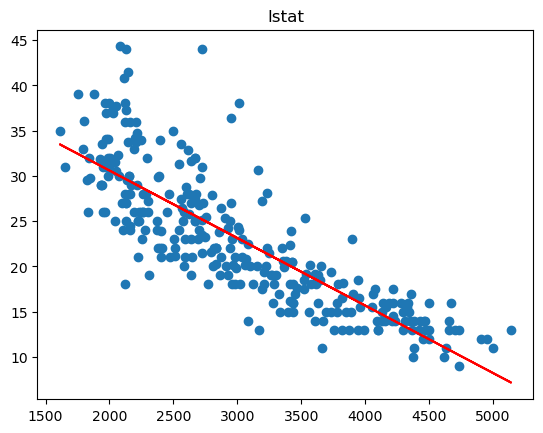

In [62]:
# fig, axes = plt.subplots(1, 2, figsize = (10, 5), sharey=True)
y = X_train*lr.coef_[0]+lr.intercept_
plt.plot(X_train, y_train, 'o', label='Fish')
plt.plot(X_train,y, 'r-', label='Poly Line')
plt.title('lstat')

plt.show()

다중항

In [63]:
pl_train = pl.transform(X_train)
pl_test  = pl.transform(X_test)

In [64]:
print(f'학습용 {type(pl_train)}, {pl_train.shape}')
print(f'테스트용 {type(pl_test)}, {pl_test.shape}')

학습용 <class 'numpy.ndarray'>, (303, 3)
테스트용 <class 'numpy.ndarray'>, (101, 3)


In [65]:
## - 선형회귀인스턴스 생성
plModel = LinearRegression()
## - 재학습
plModel.fit(pl_train, y_train)

LinearRegression()

In [66]:
## 학습 후 모델에 적용되는 a,b: 모델 파라미터
print(f"polyModel.coef_ {plModel.coef_}")
print(f"plModel.intercept_ {plModel.intercept_}")
print(f"X_train = {plModel.coef_[0]}*y_train + {plModel.intercept_}")

polyModel.coef_ [ 0.00000000e+00 -1.64615371e-02  1.40137397e-06]
plModel.intercept_ 58.92477554162885
X_train = 0.0*y_train + 58.92477554162885


In [75]:
print( "min :", X_train.min().values[0], "max :", X_train.max().values[0] )
min_x, max_x = X_train.min().values[0], X_train.max().values[0]
# minmax 해서 0~1
## - 곡선 회귀식에 대입할 데이터 
x=np.linspace(min_x, max_x)  # 1<= ~ <=42 범위에서 균등하게 50개[기본값] 데이터 생성 
print('shape :' , x.shape)
print(x)

min : 1613.0 max : 5140.0
shape : (50,)
[1613.         1684.97959184 1756.95918367 1828.93877551 1900.91836735
 1972.89795918 2044.87755102 2116.85714286 2188.83673469 2260.81632653
 2332.79591837 2404.7755102  2476.75510204 2548.73469388 2620.71428571
 2692.69387755 2764.67346939 2836.65306122 2908.63265306 2980.6122449
 3052.59183673 3124.57142857 3196.55102041 3268.53061224 3340.51020408
 3412.48979592 3484.46938776 3556.44897959 3628.42857143 3700.40816327
 3772.3877551  3844.36734694 3916.34693878 3988.32653061 4060.30612245
 4132.28571429 4204.26530612 4276.24489796 4348.2244898  4420.20408163
 4492.18367347 4564.16326531 4636.14285714 4708.12244898 4780.10204082
 4852.08163265 4924.06122449 4996.04081633 5068.02040816 5140.        ]


In [76]:
## - 곡선 회귀식 : y = x^0*W0 + x^1*W1 x^2*W2 + b
y = (1*plModel.coef_[0]) + (x * plModel.coef_[1]) + ((x**2)*plModel.coef_[2]) + plModel.intercept_

print('shape :' , y.shape)
print(y)

shape : (50,)
[36.01836762 35.16614118 34.32843595 33.50525193 32.69658912 31.90244752
 31.12282713 30.35772794 29.60714997 28.87109321 28.14955766 27.44254332
 26.75005019 26.07207827 25.40862756 24.75969805 24.12528976 23.50540268
 22.90003681 22.30919215 21.73286869 21.17106645 20.62378542 20.0910256
 19.57278698 19.06906958 18.57987339 18.10519841 17.64504463 17.19941207
 16.76830072 16.35171057 15.94964164 15.56209392 15.1890674  14.8305621
 14.486578   14.15711512 13.84217345 13.54175298 13.25585373 12.98447568
 12.72761885 12.48528322 12.25746881 12.0441756  11.84540361 11.66115282
 11.49142325 11.33621488]


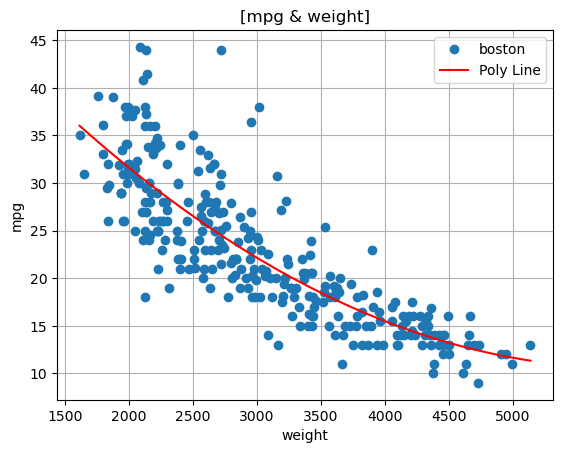

In [77]:
## 시각화 및 회귀선 -----------------------------------
## 데이터 시각화
plt.plot(X_train, y_train, 'o', label='boston')

# 선형회귀에서 구한 y=model.coef_*x+model.intercept_ 공식의 직선 긋기
plt.plot(x, y, 'r-', label='Poly Line')

plt.xlabel('weight')
plt.ylabel('mpg')
plt.title('[mpg & weight]')
plt.legend()
plt.grid()
plt.show()

In [78]:
## 모듈화
pl_dict = {x:[] for x in ['score', 'r2score','rmse', 'mse', 'mae']}
for x, y in [[pl_train, y_train], [pl_test, y_test]]:
    score = plModel.score(x, y)
    pre_y = plModel.predict(x)
    r2score = r2_score(y, pre_y)
    rmse = root_mean_squared_error(y, pre_y)
    mse = mean_squared_error(y, pre_y)
    mae = mean_absolute_error(y,pre_y)
    pl_dict['score'].append(score)
    pl_dict['r2score'].append(r2score)
    pl_dict['rmse'].append(rmse)
    pl_dict['mse'].append(mse)
    pl_dict['mae'].append(mae)

pl_dict    
    

{'score': [0.7035614225367566, 0.6735453481688554],
 'r2score': [0.7035614225367566, 0.6735453481688554],
 'rmse': [4.114481599880505, 4.778320336319751],
 'mse': [16.928958835755243, 22.83234523648689],
 'mae': [3.0172881593752416, 3.412039089863602]}

In [79]:
plDF = pd.DataFrame(pl_dict, index=['ptrain', 'ptest'])
plDF.loc['diff'] = (plDF.loc['ptrain']-plDF.loc['ptest']).abs()
plDF.round(4)

,score,r2score,rmse,mse,mae
ptrain,0.7036,0.7036,4.1145,16.9290,3.0173
ptest,0.6735,0.6735,4.7783,22.8323,3.4120
diff,0.0300,0.0300,0.6638,5.9034,0.3948


In [80]:
knnDF.round(4)

,score,r2score,rmse,mse,mae
train,0.7638,0.7638,3.6730,13.4910,2.6350
test,0.6326,0.6326,5.0692,25.6965,3.5479
diff,0.1312,0.1312,1.3962,12.2055,0.9129


In [81]:
lrDF.round(4)

,score,r2score,rmse,mse,mae
train,0.6876,0.6876,4.2238,17.8401,3.1658
test,0.6414,0.6414,5.0080,25.0798,3.7538
diff,0.0462,0.0462,0.7842,7.2396,0.5880
